In [1]:
import tensorflow as tf 
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt 

Loading the dataset into batches (tensorflow dataset )

In [11]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",shuffle=True,image_size=(256,256),batch_size=32)

Found 2152 files belonging to 3 classes.


In [12]:
class_names = dataset.class_names

In [13]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [14]:
len(dataset)

68

In [19]:
#The dataset data is stored as tensors , to convert it into numpy do .numpy()
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(image_batch[0].shape)

(32, 256, 256, 3)
[2 2 0 0 1 0 0 0 2 1 1 1 0 0 2 2 2 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1]
(256, 256, 3)


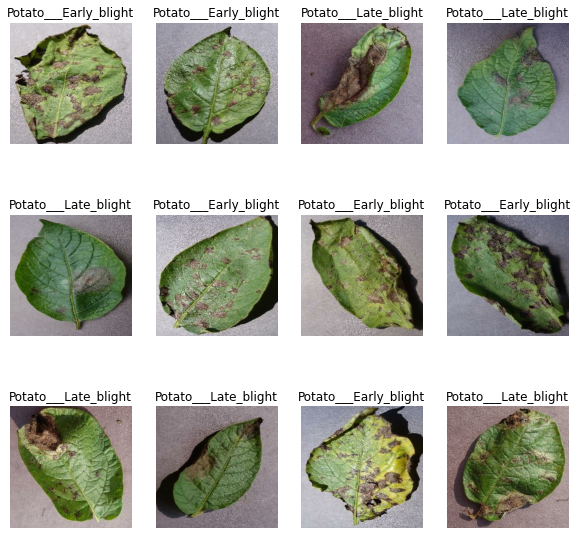

In [38]:
plt.figure(figsize =(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [42]:
#we have 2152 images in total in our computer folders
#32*68 = 2176
train_size = 0.8
validation_size = 0.1
test_size = 0.1
len(dataset)*train_size

54.400000000000006

In [43]:
#take first 54 shuffled batches in the train dataset
train_ds = dataset.take(54)
len(train_ds)

54

In [44]:
test_val_ds = dataset.skip(54)
len(test_val_ds)

14

In [45]:
val_ds = test_val_ds.take(6)
len(val_ds)

6

In [47]:
test_ds = test_val_ds.skip(6)
len(test_ds)

8

In [58]:
def get_train_val_test_ds(ds,train_size_=0.8,val_size_=0.1,test_size_=0.1,shuffle=True,shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12) #seed is just an argument for getting same type of anwers everytime
    train_size = int(train_size_*ds_size)
    val_size = int(val_size_ * ds_size)
    test_size = int(test_size_ * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [59]:
train_ds,val_ds,test_ds = get_train_val_test_ds(dataset)

In [60]:
len(train_ds)

54

In [61]:
len(val_ds)

6

In [62]:
len(test_ds)

8

Optimising my dataset so that it runs faster

In [63]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size =tf.data.AUTOTUNE)

In [64]:
resize_and_rescale_layer = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [65]:
data_augmentation_layer = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),  
])